## Compile people list

In [ ]:
df1 = pd.read_csv('Data/30B113K_scraped_0Kto50K.csv', sep=';', encoding='utf-8', parse_dates=['publish_date'])
df2 = pd.read_csv('Data/30B113K_scraped_50KtoEnd.csv', sep=';', encoding='utf-8', parse_dates=['publish_date'])
df = df1.append(df2)

In [129]:
# left = df[df.mix_rating == 'left'].sample(n=4000,weights='year')
left = df[df.mix_rating == 'left'].groupby('year').apply(lambda x: x.sample(n=300))
center = df[df.mix_rating == 'center'].groupby('year').apply(lambda x: x.sample(n=300))
right = df[df.mix_rating == 'right'].groupby('year').apply(lambda x: x.sample(n=300))

In [130]:
left['people'] = left.text.apply(lambda x: NERPeople(x))
center['people'] = center.text.apply(lambda x: NERPeople(x))
right['people'] = right.text.apply(lambda x: NERPeople(x))

In [466]:
df[df.mix_rating == 'center'].groupby('year').count()

,media_name,title,text,url,error,publish_date,stories_id,mix_rating,datetime,date
year,,,,,,,,,,
2012,1327,1327,1327,1327,0,1327,1327,1327,1327,1327
2013,3611,3611,3611,3611,0,3611,3611,3611,3611,3611
2014,1164,1164,1164,1164,0,1164,1164,1164,1164,1164
2015,1548,1548,1548,1548,0,1548,1548,1548,1548,1548
2016,2319,2319,2319,2319,0,2319,2319,2319,2319,2319
2017,1404,1404,1404,1404,0,1404,1404,1404,1404,1404
2018,3271,3271,3271,3271,0,3271,3271,3271,3271,3271
2019,2657,2657,2657,2657,0,2657,2657,2657,2657,2657


In [131]:
# count all people
def PopularPeople(df):
    pop_people = {}
    for dic in df.people:
        for person in dic.keys():
            pop_people[person.lower()] = pop_people.get(person.lower(), 0) + 1
    return {k: v for k, v in sorted(pop_people.items(), key=lambda item: item[1], reverse=True)}

people_left = PopularPeople(left)
people_center = PopularPeople(center)
people_right = PopularPeople(right)

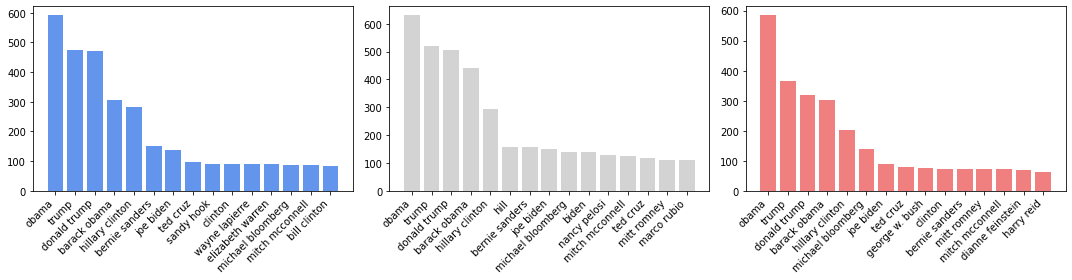

In [172]:
# plot people
people_left_top = dict(itertools.islice(people_left.items(), 15))
people_center_top = dict(itertools.islice(people_center.items(), 15))
people_right_top = dict(itertools.islice(people_right.items(), 15))

fig, ax = plt.subplots(1,3,figsize=(15,4))

ax[0].bar(range(len(people_left_top)), list(people_left_top.values()), color='cornflowerblue');
ax[0].set_xticks(range(len(people_left_top)))
ax[0].set_xticklabels(list(people_left_top.keys()), rotation=45, ha='right')

ax[1].bar(range(len(people_center_top)), list(people_center_top.values()), color='lightgrey');
ax[1].set_xticks(range(len(people_center_top)))
ax[1].set_xticklabels(list(people_center_top.keys()), rotation=45, ha='right')

ax[2].bar(range(len(people_right_top)), list(people_right_top.values()), color='lightcoral');
ax[2].set_xticks(range(len(people_right_top)))
ax[2].set_xticklabels(list(people_right_top.keys()), rotation=45, ha='right')


fig.tight_layout()
# fig.savefig('Graphs/gun_control_media.svg')

In [133]:
# count people
dicts = [people_left, people_center, people_right]
people_all = {}
for d in dicts:
    for person, count in d.items():
        people_all[person] = people_all.get(person, 0) + d.get(person,0)
people_all = {k: v for k, v in sorted(people_all.items(), key=lambda item: item[1], reverse=True)}

In [572]:
# compile dataset to be annotated
people_all = dict(itertools.islice(people_all.items(), 1500))
people_all = list(people_all.keys())
people_all = pd.DataFrame(people_all, columns=['person'])
people_all['guns'] = None
people_all['politician'] = None
people_all['activist'] = None
people_all['tv/artist'] = None
people_all['perpetrator'] = None
people_all['victim'] = None
people_all['other'] = None

for i, person in enumerate(people_all.person):
    print(person)
    for p, v in zip(perpetrators,victims):
        if fuzz.ratio(person, p.lower()) > 80:
            print('MATCH perp')
            people_all.perpetrator.iloc[i] = 1            
        if fuzz.ratio(person, v.lower()) > 80:
            print('MATCH victim')
            people_all.victim.iloc[i] = 1
    
    for j, name in enumerate(nra.name):
        if person == name.lower():
            people_all.politician.iloc[i] = 1
            if nra.dummy.iloc[j] == 1:
                print('MATCH NRA PRO')
                people_all.guns.iloc[i] = 'pro'
            if nra.dummy.iloc[j] == 0:
                print('MATCH NRA CONTRA')
                people_all.guns.iloc[i] = 'contra'
                
people_all

obama
trump
donald trump
barack obama
hillary clinton
bernie sanders
MATCH NRA CONTRA
MATCH NRA CONTRA
michael bloomberg
joe biden
ted cruz
MATCH NRA PRO
MATCH NRA PRO
mitch mcconnell
MATCH NRA PRO
MATCH NRA PRO
clinton
mitt romney
MATCH NRA PRO
george w. bush
marco rubio
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
elizabeth warren
MATCH NRA CONTRA
MATCH NRA CONTRA
nancy pelosi
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
paul ryan
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
bill clinton
dianne feinstein
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
harry reid
MATCH NRA PRO
wayne lapierre
hill
biden
sandy hook
bush
john mccain
MATCH NRA PRO
MATCH NRA PRO
ronald reagan
gabrielle giffords
MATCH NRA CONTRA
adam lanza
MATCH perp
rand paul
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
chris christie
newtown
chuck schumer
MATCH NRA CONTRA
MATCH NRA CONTRA
joe manchin
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA CONTRA
ga

MATCH NRA PRO
MATCH NRA PRO
chris w. cox
pat roberts
MATCH NRA PRO
MATCH NRA PRO
thad cochran
MATCH NRA PRO
MATCH NRA PRO
murphy
assad
batman
youtube
sarah
john dickerson
dawn hochsprung
oprah winfrey
tulsi gabbard
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
john f. kennedy
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
michael moore
MATCH NRA PRO
mike pompeo
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
wendy davis
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
adam schiff
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
david keene
arne duncan
glenn beck
ted kennedy
MATCH NRA CONTRA
tom perez
bill cassidy
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
maggie hassan
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
larry keane
amy schumer
jacinda ardern
boehner
fdr
rex tillerson
john kelly
MATCH NRA PRO
MATCH NRA PRO
ted deutch
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CO

andrea mitchell
david cameron
pat buchanan
mike dewine
MATCH NRA CONTRA
ethan miller
roosevelt
scott peters
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
don lemon
nan whaley
jared lee loughner
alito
jordan davis
chuck hagel
colin powell
andrew
condoleezza rice
tom harkin
adolf hitler
warren buffett
miller
larry king
nicole hockley
john hanlin
wade
anthony scaramucci
andrew gillum
MATCH NRA CONTRA
brian fitzpatrick
MATCH NRA PRO
MATCH NRA CONTRA
newt
jason chaffetz
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
leahy
howard kurtz
booker
sturm
andy
dwight eisenhower
denis mcdonough
walker
flynn
ilhan omar
MATCH NRA CONTRA
doug mcmillon
jackie speier
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
pia carusone
marsha blackburn
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
bannon
melania trump
katie couric
jerrold nadler
MATCH NRA CONTRA
MATCH NR

anna
pi
ben chang
tim seelig
elena schneider
garrett ross
byron tau
jake
ann wagner
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
catherine cortez masto
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
jeff bezos
joe sestak
MATCH NRA CONTRA
neil heslin
dean skelos
MATCH NRA CONTRA
amber
tom king
MATCH NRA PRO
mark levin
phil mendelson
ken klukowski
john nolte
david lauter
recaptcha


j. paul vance
anti-obama
breyer
rommel dionisio
christopher s. murphy
jeff zeleny
garrett
emmanuel macron
dennis baxley
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
buzzfeed
peter
jesus christ
david leonhardt
duke
omar
benjamin crump
diana degette
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
MATCH NRA CONTRA
marshall
richard pearson
peggy noonan
cory
dan balz
lady gaga
john wayne
asperger
julian zelizer
john hinckley jr.
new yorker
jason
pete williams
nelson mandela
amy walter
shakespeare
gordon
ivanka
scott pruitt
MATCH NRA PRO
MATCH NRA PRO
daniel inouye
MATCH N

MATCH NRA CONTRA
susan rice
jacky rosen
MATCH NRA CONTRA
MATCH NRA CONTRA
j.b. pritzker
jeffrey toobin
jesse jackson jr.
esquire
cathy mcmorris rodgers
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
ryan williams
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
bret baier
magpul
john r. lott jr.
theblaze
tomi lahren
charles hurt
ryan jerome
michael barone
jennifer granholm
pierre thomas
truman
cathleen decker
steve lopez
paul vance
manuel balce ceneta
jessica ghawi
lee atwater
mandel ngan
bill o'reilly
christopher martinez
MATCH victim
veronika weiss
george chen
sarah wire
lisa mascaro
alice walton
lester holt
edward stack
justin bieber
gunmaker
tom hanks
henry kissinger
anthony weiner
MATCH NRA CONTRA
ryan grim
rick weiland
MATCH NRA CONTRA
president
miley cyrus
trent franks
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
MATCH NRA PRO
jodie foster
strom thurmond
donna
gerald ford
seema mehta

,person,guns,politician,activist,tv/artist,perpetrator,victim,other
0,obama,None,None,None,None,None,None,None
1,trump,None,None,None,None,None,None,None
2,donald trump,None,None,None,None,None,None,None
3,barack obama,None,None,None,None,None,None,None
4,hillary clinton,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
1495,greg gianforte,pro,1,None,None,None,None,None
1496,alex stamos,None,None,None,None,None,None,None
1497,paul mccartney,None,None,None,None,None,None,None
1498,delaney tarr,None,None,None,None,None,None,None


In [574]:
people_all[(people_all.guns.isnull() != True) | 
           (people_all.perpetrator.isnull() != True) |
           (people_all.victim.isnull() != True)]

,person,guns,politician,activist,tv/artist,perpetrator,victim,other
5,bernie sanders,contra,1,None,None,None,None,None
8,ted cruz,pro,1,None,None,None,None,None
9,mitch mcconnell,pro,1,None,None,None,None,None
11,mitt romney,pro,1,None,None,None,None,None
13,marco rubio,pro,1,None,None,None,None,None
...,...,...,...,...,...,...,...,...
1473,judy chu,contra,1,None,None,None,None,None
1478,robert kennedy,contra,1,None,None,None,None,None
1481,g.k. butterfield,contra,1,None,None,None,None,None
1493,roy cooper,contra,1,None,None,None,None,None


In [575]:
people_all.to_csv('Data/people_sample.csv', sep=';', index=False)

In [561]:
# read NRA Ratings
nra = pd.read_csv('Data/nra-grades_09-18.csv', sep=';', encoding='latin-1')
# set nra gun support dummy variable
def NRADummy(row):
    if row in ['A', 'A+', 'A-', 'AQ', 'B', 'B+', 'B-']:
        return 1
    if row == '?':
        return None
    else: 
        return 0
    
nra['dummy'] = nra.grade.apply(lambda x: NRADummy(x))

In [8]:
annotiert[annotiert.guns.isnull() == False]

,person,match,guns,politician,activist,tv_artist,perpetrator,victim,other,coder
0,obama,barack obama,contra,1.0,NaN,NaN,NaN,NaN,NaN,jonas
1,trump,donald trump,pro,1.0,NaN,NaN,NaN,NaN,NaN,jonas
2,donald trump,NaN,pro,1.0,NaN,NaN,NaN,NaN,NaN,jonas
3,barack obama,NaN,contra,1.0,NaN,NaN,NaN,NaN,NaN,jonas
4,hillary clinton,NaN,contra,1.0,NaN,NaN,NaN,NaN,NaN,jonas
...,...,...,...,...,...,...,...,...,...,...
1491,judy chu,NaN,contra,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1496,robert kennedy,NaN,contra,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1499,g.k. butterfield,NaN,contra,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1511,roy cooper,NaN,contra,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
people = pd.read_csv('Data/people_sample.csv', sep=';')
annotiert = pd.read_csv('Data/annotated_persons.csv', sep=';', encoding='utf-8')